In [356]:
import pandas as pd
import numpy as np

## Load Data

In [357]:
train_data = pd.read_csv('./house-prices-advanced-regression-techniques/train.csv')
test_data = pd.read_csv('./house-prices-advanced-regression-techniques/test.csv')


# Exploratory Data Analysis

In [358]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

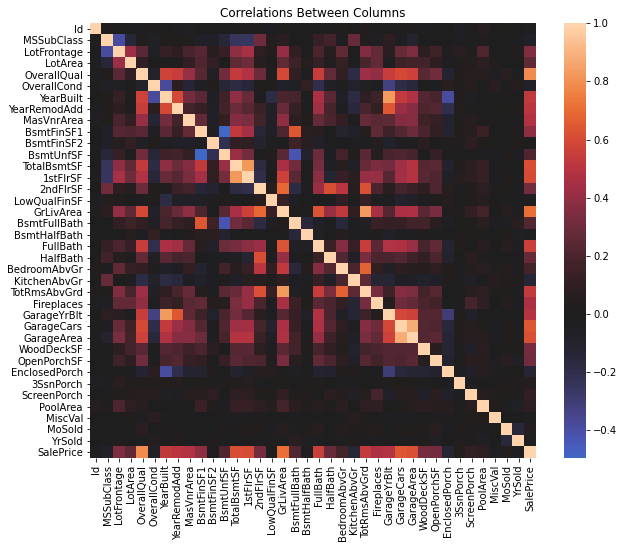

In [383]:

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
sns.heatmap(train_data.corr(), center = 0)
plt.title("Correlations Between Columns")
plt.show()

## Split input and target variables

In [384]:
y = train_data.SalePrice
X = train_data.drop(columns=["SalePrice"], axis=1)

In [385]:
y.shape, X.shape, test_data.shape

((1460,), (1460, 80), (1459, 80))

## Choose only the significant features, discard those with correlation score < 0.5 with the target variable

In [542]:
corr_matrix = train_data.corr()

In [387]:
corr_matrix['SalePrice'][(corr_matrix["SalePrice"] > 0.40) | (corr_matrix["SalePrice"] < -0.40)]

OverallQual     0.790982
YearBuilt       0.522897
YearRemodAdd    0.507101
MasVnrArea      0.477493
TotalBsmtSF     0.613581
1stFlrSF        0.605852
GrLivArea       0.708624
FullBath        0.560664
TotRmsAbvGrd    0.533723
Fireplaces      0.466929
GarageYrBlt     0.486362
GarageCars      0.640409
GarageArea      0.623431
SalePrice       1.000000
Name: SalePrice, dtype: float64

In [426]:
important_num_cols = list(corr_matrix['SalePrice'][(corr_matrix["SalePrice"] > 0.5) | (corr_matrix["SalePrice"] < -0.5)].index)

important_num_cols.remove('SalePrice')
len(important_num_cols)

10

In [427]:
important_num_cols

['OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'GarageCars',
 'GarageArea']

In [428]:
X_num_only = X[important_num_cols]

In [429]:
X_num_only.shape

(1460, 10)

## Remove the feautures which are highly correlated with each other

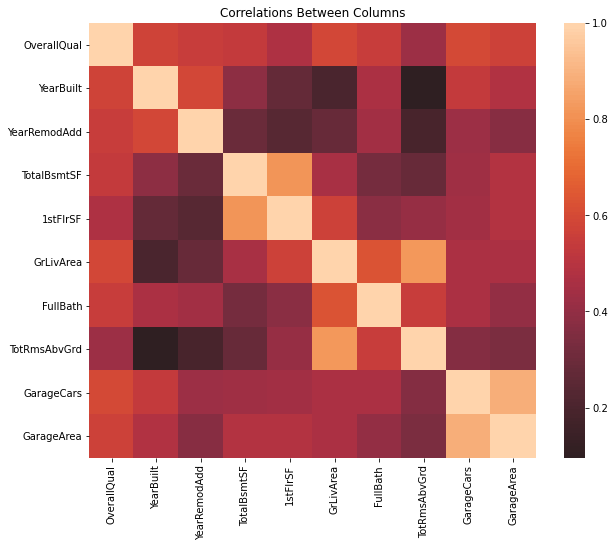

In [430]:
plt.figure(figsize=(10,8))
sns.heatmap(X_num_only.corr(), center = 0)
plt.title("Correlations Between Columns")
plt.show()

In [431]:
corr_X = X_num_only.corr()
len(corr_X)

10

In [432]:

for i in range(0, len(corr_X) - 1):
    for j in range(i + 1, len(corr_X)):
        if(corr_X.iloc[i, j] < -0.6 or corr_X.iloc[i, j] > 0.6):
            print(corr_X.iloc[i, j], i, j, corr_X.index[i], corr_X.index[j])
            

0.6006707165907149 0 8 OverallQual GarageCars
0.8195299750050339 3 4 TotalBsmtSF 1stFlrSF
0.6300116462511148 5 6 GrLivArea FullBath
0.8254893743088425 5 7 GrLivArea TotRmsAbvGrd
0.882475414281462 8 9 GarageCars GarageArea


In [454]:
# Based on the above information, we further discard the features 1stFlrSF, FullBath, TotRmsAbvGrd, GarageArea
#num_cols = [i for i in X_modified.columns if i not in ['1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'GarageArea']]
num_cols = [i for i in X_num_only.columns if i not in ['1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'GarageArea']]


In [455]:
# Categorical columns - choose the important ones

cat_cols = ["MSZoning", "Utilities","BldgType","Heating","KitchenQual","SaleCondition","LandSlope"]

In [456]:
X_final = X[num_cols]

In [457]:
X_final.shape

(1460, 6)

## Modify 'YearRemodAdd' feature - make it more informative

In [458]:
X_final['YearRemodAdd'] = X_final['YearRemodAdd'] - X_final['YearBuilt']

<ipython-input-458-09b41458755c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_final['YearRemodAdd'] = X_final['YearRemodAdd'] - X_final['YearBuilt']


In [459]:
X_final.head()

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,GrLivArea,GarageCars
0,7,2003,0,856,1710,2
1,6,1976,0,1262,1262,2
2,7,2001,1,920,1786,2
3,7,1915,55,756,1717,3
4,8,2000,0,1145,2198,3


## Handling missing data

In [460]:
X_final.isna().sum()

OverallQual     0
YearBuilt       0
YearRemodAdd    0
TotalBsmtSF     0
GrLivArea       0
GarageCars      0
dtype: int64

In [461]:
#X_final['MasVnrArea'] = X_final['MasVnrArea'].fillna(X_final['MasVnrArea'].median())

In [507]:
X[cat_cols].isna().sum()

MSZoning         0
Utilities        0
BldgType         0
Heating          0
KitchenQual      0
SaleCondition    0
LandSlope        0
dtype: int64

## Encoding Categorical data

In [462]:
X_categorical_df = pd.get_dummies(X[cat_cols], columns=cat_cols)

In [463]:
X_categorical_df

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Utilities_AllPub,Utilities_NoSeWa,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,...,KitchenQual_TA,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev
0,0,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
1,0,0,0,1,0,1,0,1,0,0,...,1,0,0,0,0,1,0,1,0,0
2,0,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
3,0,0,0,1,0,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
4,0,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,0,1,0,1,0,1,0,0,...,1,0,0,0,0,1,0,1,0,0
1456,0,0,0,1,0,1,0,1,0,0,...,1,0,0,0,0,1,0,1,0,0
1457,0,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
1458,0,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0


In [464]:
# Create final dataframe

In [465]:
X_final = X_final.join(X_categorical_df)

In [466]:
X_final

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,GrLivArea,GarageCars,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,...,KitchenQual_TA,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev
0,7,2003,0,856,1710,2,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0
1,6,1976,0,1262,1262,2,0,0,0,1,...,1,0,0,0,0,1,0,1,0,0
2,7,2001,1,920,1786,2,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0
3,7,1915,55,756,1717,3,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
4,8,2000,0,1145,2198,3,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1999,1,953,1647,2,0,0,0,1,...,1,0,0,0,0,1,0,1,0,0
1456,6,1978,10,1542,2073,2,0,0,0,1,...,1,0,0,0,0,1,0,1,0,0
1457,7,1941,65,1152,2340,1,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0
1458,5,1950,46,1078,1078,1,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0


## Normalizing the data

In [467]:
from sklearn import preprocessing
standardize = preprocessing.StandardScaler().fit(X_final[num_cols])

In [468]:
#See mean per column
standardize.mean_

array([6.09931507e+00, 1.97126781e+03, 1.35979452e+01, 1.05742945e+03,
       1.51546370e+03, 1.76712329e+00])

In [469]:
#transform
X_final[num_cols] = standardize.transform(X_final[num_cols])

In [470]:
X_final

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,GrLivArea,GarageCars,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,...,KitchenQual_TA,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev
0,0.651479,1.050994,-0.555742,-0.459303,0.370333,0.311725,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0
1,-0.071836,0.156734,-0.555742,0.466465,-0.482512,0.311725,0,0,0,1,...,1,0,0,0,0,1,0,1,0,0
2,0.651479,0.984752,-0.514873,-0.313369,0.515013,0.311725,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0
3,0.651479,-1.863632,1.692084,-0.687324,0.383659,1.650307,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
4,1.374795,0.951632,-0.555742,0.199680,1.299326,1.650307,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,-0.071836,0.918511,-0.514873,-0.238122,0.250402,0.311725,0,0,0,1,...,1,0,0,0,0,1,0,1,0,0
1456,-0.071836,0.222975,-0.147046,1.104925,1.061367,0.311725,0,0,0,1,...,1,0,0,0,0,1,0,1,0,0
1457,0.651479,-1.002492,2.100780,0.215641,1.569647,-1.026858,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0
1458,-0.795151,-0.704406,1.324258,0.046905,-0.832788,-1.026858,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0


In [471]:
X_final.head()

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,GrLivArea,GarageCars,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,...,KitchenQual_TA,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev
0,0.651479,1.050994,-0.555742,-0.459303,0.370333,0.311725,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0
1,-0.071836,0.156734,-0.555742,0.466465,-0.482512,0.311725,0,0,0,1,...,1,0,0,0,0,1,0,1,0,0
2,0.651479,0.984752,-0.514873,-0.313369,0.515013,0.311725,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0
3,0.651479,-1.863632,1.692084,-0.687324,0.383659,1.650307,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
4,1.374795,0.951632,-0.555742,0.199680,1.299326,1.650307,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0


## Split training data into training and validation

In [472]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_final, y, test_size=0.2, random_state=1)

In [473]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((1168, 37), (292, 37), (1168,), (292,))

## Regression Using Machine Learning 

In [543]:
from sklearn.metrics import r2_score 
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.preprocessing import PolynomialFeatures

In [478]:
perf = []
method = []

In [479]:
# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
predictions = lin_reg.predict(X_val)

r_squared = r2_score(predictions, y_val)

print("R2 Score:", r_squared)
method.append('Linear Regression')
perf.append(r_squared)

R2 Score: 0.7670082797567473


In [481]:
# Ridge regression
ridge = Ridge()
ridge.fit(X_train, y_train)
predictions = ridge.predict(X_val)

r_squared = r2_score(predictions, y_val)

print("R2 Score:", r_squared)
method.append('Ridge Regression')
perf.append(r_squared)

R2 Score: 0.7671007768878557


In [483]:
# Ridge regression
lasso = Lasso()
lasso.fit(X_train, y_train)
predictions = lasso.predict(X_val)

r_squared = r2_score(predictions, y_val)

print("R2 Score:", r_squared)
method.append('Lasso Regression')
perf.append(r_squared)

R2 Score: 0.7670332119031441


In [497]:
# support vector regression
svr = SVR(C=1000000)
svr.fit(X_train, y_train)
predictions = svr.predict(X_val)

r_squared = r2_score(predictions, y_val)

print("R2 Score:", r_squared)
#method.append('SVM')
#perf.append(r_squared)

R2 Score: 0.863743596033411


In [499]:
#Random forest regressor
random_forest = RandomForestRegressor(n_estimators=100)
random_forest.fit(X_train, y_train)
predictions = random_forest.predict(X_val)

r_squared = r2_score(predictions, y_val)

print("R2 Score:", r_squared)
method.append('SVM')
perf.append(r_squared)

R2 Score: 0.8869091088126252


In [505]:
# xgboost
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators=1000, learning_rate=0.01)
xgb.fit(X_train, y_train)
predictions = xgb.predict(X_val)

r_squared = r2_score(predictions, y_val)

print("R2 Score:", r_squared)
method.append('XGBoost Regressor')
perf.append(r_squared)

R2 Score: 0.8750165471150491


## Testing

In [509]:
# Test Data Preprocessing

X_test = test_data[num_cols + cat_cols]
X_test['YearRemodAdd'] = X_test['YearRemodAdd'] - X_test['YearBuilt']

<ipython-input-509-0ec6065794a4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['YearRemodAdd'] = X_test['YearRemodAdd'] - X_test['YearBuilt']


In [510]:
X_test.shape

(1459, 13)

In [511]:
# Encode categorical similar to train
X_test = pd.get_dummies(X_test)

In [512]:
X_test

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,GrLivArea,GarageCars,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,...,KitchenQual_TA,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev
0,5,1961,0,882.0,896,1.0,0,0,1,0,...,1,0,0,0,0,1,0,1,0,0
1,6,1958,0,1329.0,1329,1.0,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0
2,5,1997,1,928.0,1629,2.0,0,0,0,1,...,1,0,0,0,0,1,0,1,0,0
3,6,1998,0,926.0,1604,2.0,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0
4,8,1992,0,1280.0,1280,2.0,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,4,1970,0,546.0,1092,0.0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
1455,4,1970,0,546.0,1092,1.0,0,0,0,0,...,1,1,0,0,0,0,0,1,0,0
1456,5,1960,36,1224.0,1224,2.0,0,0,0,1,...,1,1,0,0,0,0,0,1,0,0
1457,5,1992,0,912.0,970,0.0,0,0,0,1,...,1,0,0,0,0,1,0,1,0,0


In [513]:
# Add missed columns missed due to get dummies on X_test
X_test = X_test.reindex(columns = X_final.columns, fill_value=0)

In [514]:
X_test

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,GrLivArea,GarageCars,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,...,KitchenQual_TA,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev
0,5,1961,0,882.0,896,1.0,0,0,1,0,...,1,0,0,0,0,1,0,1,0,0
1,6,1958,0,1329.0,1329,1.0,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0
2,5,1997,1,928.0,1629,2.0,0,0,0,1,...,1,0,0,0,0,1,0,1,0,0
3,6,1998,0,926.0,1604,2.0,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0
4,8,1992,0,1280.0,1280,2.0,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,4,1970,0,546.0,1092,0.0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
1455,4,1970,0,546.0,1092,1.0,0,0,0,0,...,1,1,0,0,0,0,0,1,0,0
1456,5,1960,36,1224.0,1224,2.0,0,0,0,1,...,1,1,0,0,0,0,0,1,0,0
1457,5,1992,0,912.0,970,0.0,0,0,0,1,...,1,0,0,0,0,1,0,1,0,0


In [515]:
#transform
X_test[num_cols] = standardize.transform(X_test[num_cols])

In [516]:
X_test

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,GrLivArea,GarageCars,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,...,KitchenQual_TA,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev
0,-0.795151,-0.340077,-0.555742,-0.400017,-1.179256,-1.026858,0,0,1,0,...,1,0,0,0,0,1,0,1,0,0
1,-0.071836,-0.439440,-0.555742,0.619239,-0.354966,-1.026858,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0
2,-0.795151,0.852269,-0.514873,-0.295127,0.216136,0.311725,0,0,0,1,...,1,0,0,0,0,1,0,1,0,0
3,-0.071836,0.885390,-0.555742,-0.299687,0.168544,0.311725,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0
4,1.374795,0.686666,-0.555742,0.507509,-0.448246,0.311725,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,-1.518467,-0.041991,-0.555742,-1.166169,-0.806136,-2.365440,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
1455,-1.518467,-0.041991,-0.555742,-1.166169,-0.806136,-1.026858,0,0,0,0,...,1,1,0,0,0,0,0,1,0,0
1456,-0.795151,-0.373198,0.915562,0.379817,-0.554851,0.311725,0,0,0,1,...,1,1,0,0,0,0,0,1,0,0
1457,-0.795151,0.686666,-0.555742,-0.331610,-1.038384,-2.365440,0,0,0,1,...,1,0,0,0,0,1,0,1,0,0


## Handling missing data in test data

In [517]:
X_test.isna().sum()

OverallQual              0
YearBuilt                0
YearRemodAdd             0
TotalBsmtSF              1
GrLivArea                0
GarageCars               1
MSZoning_C (all)         0
MSZoning_FV              0
MSZoning_RH              0
MSZoning_RL              0
MSZoning_RM              0
Utilities_AllPub         0
Utilities_NoSeWa         0
BldgType_1Fam            0
BldgType_2fmCon          0
BldgType_Duplex          0
BldgType_Twnhs           0
BldgType_TwnhsE          0
Heating_Floor            0
Heating_GasA             0
Heating_GasW             0
Heating_Grav             0
Heating_OthW             0
Heating_Wall             0
KitchenQual_Ex           0
KitchenQual_Fa           0
KitchenQual_Gd           0
KitchenQual_TA           0
SaleCondition_Abnorml    0
SaleCondition_AdjLand    0
SaleCondition_Alloca     0
SaleCondition_Family     0
SaleCondition_Normal     0
SaleCondition_Partial    0
LandSlope_Gtl            0
LandSlope_Mod            0
LandSlope_Sev            0
d

In [523]:
# we will use median for missing values
X_test['TotalBsmtSF'] = X_test['TotalBsmtSF'].fillna(train_data['TotalBsmtSF'].median())

In [528]:
# mode for cars
X_test['GarageCars'] = X_test['GarageCars'].fillna(train_data['GarageCars'].mode()[0])

In [530]:
preds = random_forest.predict(X_test)

In [531]:
preds

array([113454.33333333, 154036.32      , 172038.26      , ...,
       141790.18      , 121497.1       , 242917.52      ])

In [539]:
submit = pd.DataFrame({'Id': test_data['Id'], 'SalePrice': preds})

In [540]:
submit

,Id,SalePrice
0,1461,113454.333333
1,1462,154036.320000
2,1463,172038.260000
3,1464,189955.000000
4,1465,201027.520000
...,...,...
1454,2915,78896.500000
1455,2916,84292.000000
1456,2917,141790.180000
1457,2918,121497.100000


In [541]:
submit.to_csv('submit.csv',index=False)

